# Distribuciones de probabilidad continua

Las variables aleatorias continuas son aquellas que pueden tomar un número infinito de valores posibles, generalmente cualquier valor dentro de un intervalo específico.

A diferencia de las variables aleatorias discretas, que tienen un conjunto contable de resultados posibles y en los cuales se estudiaba la probabilidad de que la variable aleatoria tome un valor fijo. $P(X=3)$, en este caso se tiene que:

* La probabilidad de que una variable aleatoria $X$ tome un valor exacto $P(X=3) =0$.
* Se estudia en su lugar la probabilidad de que la v.a. caiga dentro de un intervalo. $P(a \leq X \leq b)$.




### Función de Densidad de Probabilidad (FDP)
La manera principal de describir una variable aleatoria continua es a través de su Función de Densidad de Probabilidad (FDP), también conocida como **función de densidad**. La FDP, denotada a menudo por
$f(x)$, es una función que describe la relativa "densidad" de probabilidad en diferentes puntos en el rango de la variable aleatoria. No da la probabilidad en sí, sino que se utiliza para calcular la probabilidad de que la variable aleatoria caiga dentro de un intervalo específico.

### Calcular Probabilidades con la FDP
Para una variable aleatoria continua $X$ con función de densidad $f(x)$, la probabilidad de que $X$ caiga dentro del intervalo $[a,b]$ se calcula integrando la FDP sobre ese intervalo:

$$ P(a\leq X \leq b) = \int_a^b f(x) \, dx$$

Es decir, la probabilidad de que $X$ esté en el intervalo $[a,b]$ es el área bajo la curva de la FDP entre $a$ y $b$.

### Propiedades de la FDP
* La FDP $f(x)$ es siempre no negativa:
$$ f(x)\geq 0$$
para todo $x$.

* El área total bajo la curva de la FDP sobre todo el rango de $X$ es igual a 1:

$$\int_{-\infty}^{∞} f(x) \, dx = 1$$

reflejando el hecho de que la probabilidad de que $X$ tome algún valor es 100%.

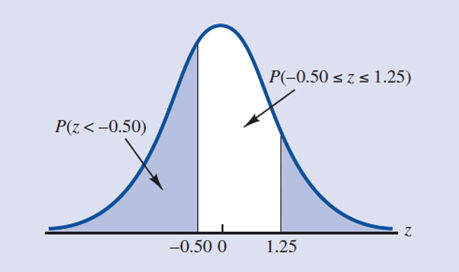

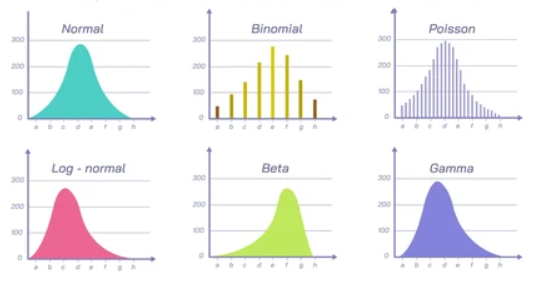

**Ojo**

No todas la variables aleatorias tienen dominio en el conjunto completo de los números reales. En otros casos, si $X = [n, p]$ para probar el segundo axioma de probabilidad, necesitamos que:

$$\int_{n}^{p} f(x) \, dx = 1$$

reflejando el hecho de que la probabilidad de que $X$ tome algún valor en ese intervalo es 100%.

**Ejemplo**

Sea x la v.a.c que representa el tiempo (en minutos) que tarda un empleado en realizar una tarea. Para el caso específico de una empresa de consultoría determinada, la f.d.p. de la variable $x$ es:

$$f\left(x\right)=\ e^{-x}, \, \, \,     \text{si } x>0$$

Primero veamos que $f(x)$ es una función de densidad:


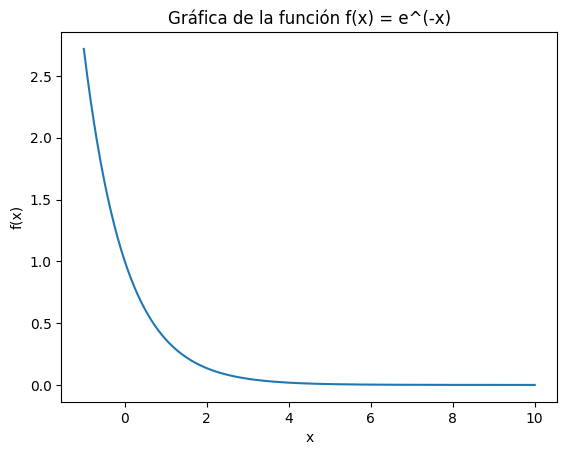

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores para x
x = np.linspace(-1, 10, 400)

# Definir la función, por ejemplo, f(x) = x^2
def f(x):
    return np.exp(-x)

# Calcular los valores de y utilizando la función definida
y = f(x)

# Crear la gráfica de la función
plt.plot(x, y)

# Añadir título y etiquetas a los ejes
plt.title('Gráfica de la función f(x) = e^(-x)')
plt.xlabel('x')
plt.ylabel('f(x)')

# Mostrar la gráfica
plt.show()


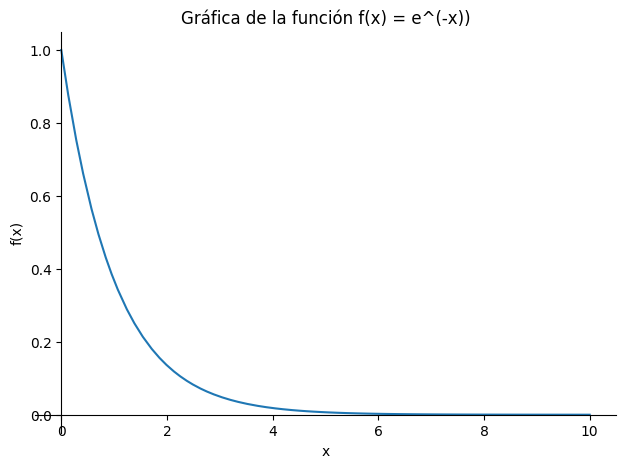

In [2]:
from sympy import*

# Definir la variable simbólica y la función
x = symbols('x')
f = exp(-x)

# Crear la gráfica de la función usando sympy
grafica = plot(f, (x, 0, 10), title='Gráfica de la función f(x) = e^(-x))', xlabel='x', ylabel='f(x)', show=False)

# Mostrar la gráfica
grafica.show()


In [3]:
I =integrate(f)
I

-exp(-x)

In [4]:
I.subs([(x, np.infty)])-I.subs([(x, 0)])

1

### Cálculo de probabilidades

¿Cuál es la probabilidad de que un empleado gaste 5 minutos o menos en realizar la tarea?

$$0 \leq X \leq 5$$

In [5]:
I.subs([(x, 5)])-I.subs([(x, 0)])

1 - exp(-5)

In [6]:
round(I.subs([(x, 5)])-I.subs([(x, 0)]), 4)

0.9933

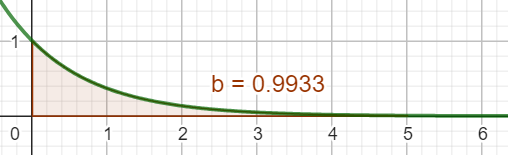

¿cuál es la probabilidad de que un empleado gaste al menos 2 minutos en realizar la tarea?

Primero calculemos la probabiliad de que se gaste entre 0 a 2minutos:

In [7]:
round(I.subs([(x, 2)])-I.subs([(x, 0)]), 4)

0.8647

Ahora usemos la ley del complemento:

In [8]:
1-round(I.subs([(x, 2)])-I.subs([(x, 0)]), 4)

0.1353

La probabilidad de que se gaste más de 2 minutos es del 0.1353.

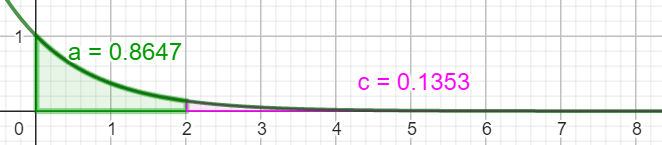

### Función de distribución

$$F(X \leq k) = \int_{-\infty}^{k} f(x) \, dx $$


In [9]:
k = symbols("k")
F=integrate(f).subs([(x,k)])-integrate(f).subs([(x,0)])
F

1 - exp(-k)

In [10]:
F.subs([(k, 5)])

1 - exp(-5)

In [11]:
round(F.subs([(k, 5)]), 4)

0.9933

In [12]:
1-round(F.subs([(k, 2)]), 4)

0.1353

La probabilidad de que un empleado gaste entre 2 y 5 minutos en realizar la tarea es:

In [13]:
round(F.subs([(k, 5)]), 4)-round(F.subs([(k, 2)]), 4)

0.1286

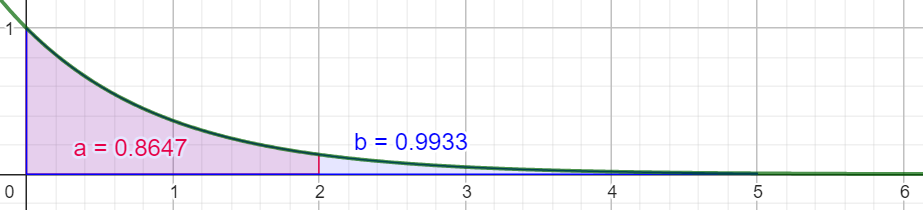

### Medidas numéricas


$$E(X) = \int_{-\infty}^{∞} xf(x) \, dx$$

**Ojo:** Es posible que el valor esperado de una v.a. no exista. Esto sucede cuando la integral correspondiente diverge.

In [14]:
f=exp(-x)
f

exp(-x)

In [15]:
E=integrate(x*f)
E

(-x - 1)*exp(-x)

In [16]:
E.subs([(x, np.infty)])

nan

In [17]:
from sympy import symbols, integrate, oo, exp

# Definir la variable simbólica
x = symbols('x')

# Definir la función para integrar
f = exp(-x)

# Calcular la integral impropia de f desde 0 a infinito
media = integrate(x*f, (x, 0, oo))

media


1

En promedio un trabajador se demora un minuto haciendo el trabajo.

**Varianza**

$$s^2=Var\left(x\right)=\int_{-\infty}^{\infty}{{(x-\mu)}^2f\left(x\right)dx}$$

In [18]:
f = exp(-x)

varianza = integrate((x-media)**2*f, (x, 0, oo))
varianza

1

**Ejercicio**

Considerando la función

$$f(x) = \frac{3}{8}(4x-2x^2), \, \, \, \text{si }\, 0\leq x \leq 2$$

Probar que es una función de densidad de probabilidad y calcular si es posible:

* Valor esperado
* Varianza
* Desviación estándar
* ¿Cuál es la probabilidad de que $x$ sea menor que 1.2?
* ¿Cuál es la probabilidad de que $x$ sea mayor que 1.2?
* ¿Cuál es la probabilidad de que $x$ esté entre 0.5 y 1.5?

# Distribución uniforme continua

La distribución uniforme continua es un tipo de distribución de probabilidad que se caracteriza por tener una probabilidad constante en un intervalo específico y cero fuera de este intervalo. En otras palabras, todas las observaciones tienen la misma probabilidad de ocurrir dentro de un rango definido. Esta distribución es utilizada para modelar situaciones donde se asume que todos los eventos tienen igual probabilidad de ocurrir dentro del intervalo especificado.

**Parámetros:**

La distribución uniforme continua se define por dos parámetros:

* $a$: El límite inferior del intervalo.
* $b$: El límite superior del intervalo.

Donde $a<b$.



### Función de Densidad de Probabilidad (FDP):

La función de densidad de probabilidad (FDP) de una distribución uniforme continua en el intervalo $[a,b]$ es:

$$
f(x) = \begin{cases}
  \frac{1}{b - a} & \text{para } a \leq x \leq b \\
  0 & \text{de lo contrario}
\end{cases}
$$

La FDP $f(x) = \frac{1}{b - a}$ indica que la densidad es constante dentro del intervalo $[a, b]$ y cero fuera de este intervalo.

### Función de Distribución Acumulativa (CDF):

La función de distribución acumulativa (CDF) de la distribución uniforme continua, que da la probabilidad de que la variable aleatoria $X$ sea menor o igual a $x$, se define como:

$$
F(x) = \begin{cases}
  0 & \text{para } x < a \\
  \frac{x - a}{b - a} & \text{para } a \leq x < b \\
  1 & \text{para } x \geq b
\end{cases}
$$

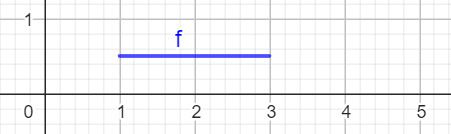

**Características:**

* La distribución uniforme continua es simétrica respecto a su media.
* La media $\mu$ y la varianza $\sigma^2$ de una distribución uniforme continua están dadas por:
    * Media: $μ = \frac{a + b}{2}$
    * Varianza: $\sigma^2 = \frac{(b - a)^2}{12}$



**Ejemplos de Aplicaciones:**

* Modelar el tiempo que toma para que ocurra un evento cuando ese tiempo es igualmente probable en un intervalo dado.
* Simulación de experimentos aleatorios donde todos los resultados son igualmente probables dentro de un rango específico.
* Distribución de variables aleatorias que describen fenómenos naturales o procesos de manufactura donde se asume uniformidad en el rango de interés.

**Función de distribución**

Si $a \leq m < n \leq b$, entonces

$$P(m <X<n) = \int_m^n \cfrac{1}{b-a}\, dx$$



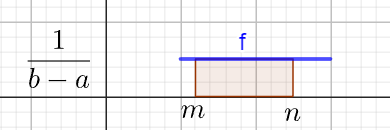


$$P(m <X<n) = \int_m^n \cfrac{1}{b-a}\, dx = (n-m)\cfrac{1}{b-a}$$

**Ejemplo**

Considere una variable aleatoria $X$ que representa el tiempo de vuelo de un avión que viaja de Chicago a Nueva York. Suponga que el tiempo de vuelo es cualquier valor en el intervalo de 120 minutos a 140 minutos.
Dado que la variable aleatoria $X$ toma cualquier valor en este intervalo, $X$ es una variable aleatoria continua y no una variable aleatoria discreta.

Admita que cuenta con datos suficientes como para concluir que la probabilidad de que el tiempo de vuelo esté en cualquier intervalo de 1 minuto es el mismo que la probabilidad de que el tiempo de vuelo esté en cualquier otro intervalo de 1 minuto dentro del intervalo que va de 120 a 140 minutos.

$a=120$

$b=140$

$b-a=20$


$$f(x) = \cfrac{1}{20}$$

¿Cuál es la probabilidad de que el tiempo de vuelo se encuentre entre 120 y 130 minutos?

In [19]:
10*1/20

0.5

 ¿cuál es la probabilidad de un tiempo de vuelo entre 128 y 136 minutos?

In [20]:
(136-128)*1/20

0.4

In [21]:
from scipy.stats import uniform
uniform.cdf(x=130, loc=120, scale=20)

0.5

In [22]:
uniform.cdf(x=136, loc=120, scale=20)-uniform.cdf(x=128, loc=120, scale=20)

0.4

**Ojo**
No olvidar que en las v.a.c. la probabilidad se calcula con la acumulada y no con f.

In [23]:
uniform.pdf(x=130, loc=120, scale=20)

0.05

In [24]:
1/20

0.05

**Generar simulaciones:**

In [25]:
a=0
b=10
muestras = uniform.rvs(loc=a, scale=b-a, size=10)

print(muestras)

[9.12624641 8.92500692 3.86375091 9.95082795 8.66592614 4.06939982
 6.20036102 7.76731224 0.4077063  4.97171993]


**Ejercicio**

En las botellas de un detergente líquido se indica que el contenido es de 12 onzas por botella. En la operación de producción se llenan las botellas uniformemente de acuerdo con la siguiente función de densidad de probabilidad.
$$f(x) =8,\, \, \, \,  \text{para } \, \, \, \, 11.975 \leq x \leq 12.100$$

* ¿Cuál es la probabilidad de que el contenido de una botella esté entre 12 y 12.05 onzas?
* ¿De que el contenido de una botella sea 12.02 onzas o más?
* En el control de calidad se acepta que una botella sea llenada con más o menos 0.02 onzas de lo indicado en la etiqueta. ¿Cuál es la probabilidad de que una de las botellas de detergente no satisfaga estos estándares?

# Distribución Normal

La distribución normal, también conocida como *distribución gaussiana*, es una de las distribuciones de probabilidad más importantes y comúnmente utilizadas en estadística y ciencia de datos. Es fundamental debido a su presencia en numerosos fenómenos naturales, sociales, y experimentales, y juega un papel crucial en el Teorema Central del Límite.

### Características clave de la distribución normal:

* Simetría: La curva de la distribución normal es simétrica alrededor de su media (μ), lo que significa que los datos a la izquierda y derecha de la media son espejos entre sí.
* Campana de Gauss: La forma de la distribución normal es la bien conocida "curva de campana".
* Media, mediana y moda coinciden: En una distribución normal, la media (μ), la mediana y la moda son iguales y se encuentran en el centro de la distribución.
* Asintótica: La curva se aproxima al eje horizontal, pero nunca lo toca, extendiéndose infinitamente en ambas direcciones.
* Dependiente de dos parámetros: La distribución está completamente especificada por dos parámetros: la media (μ) y la desviación estándar (σ). La media determina la ubicación del centro de la curva, y la desviación estándar controla el grado de dispersión o "ancho" de la curva.

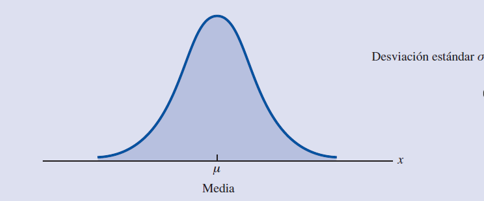

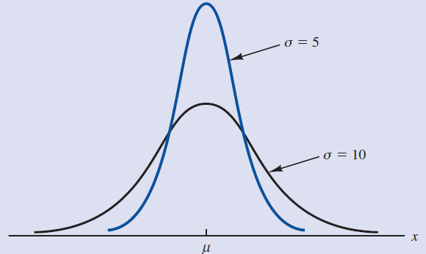

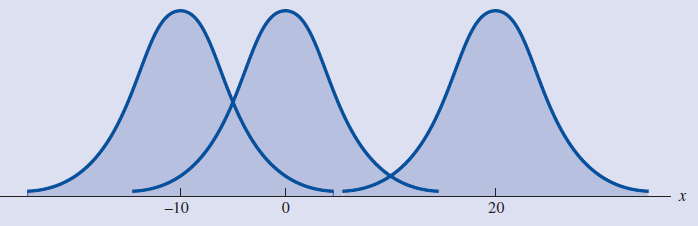

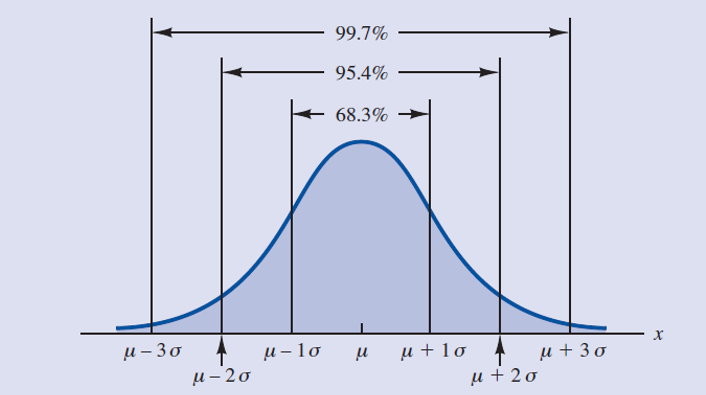

### Función de Densidad de Probabilidad (FDP):

La FDP de una distribución normal se expresa matemáticamente como:
$$f(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$
donde:

* $x$ es la variable aleatoria.
* $μ$ es la media de la distribución.
* $σ$ es la desviación estándar de la distribución.
* $e ≈2.71$ es la base del logaritmo natural.
* $π ≈3.14$ es Pi, una constante matemática.

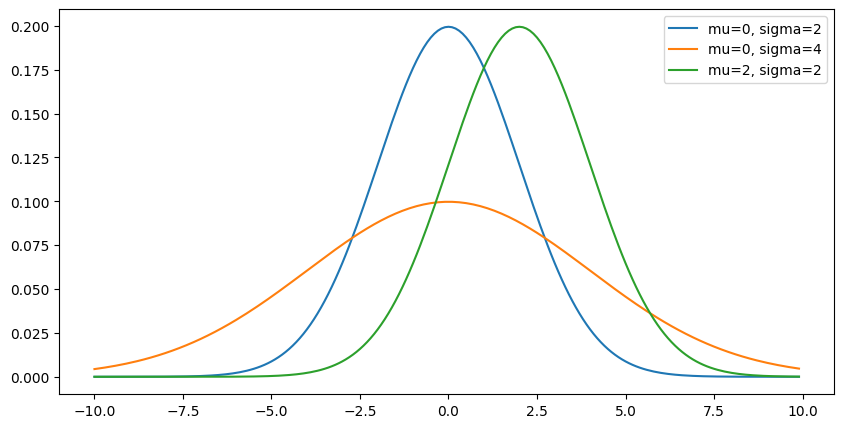

In [26]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
x = np.arange(-10, 10, 0.1)

y1 = norm.pdf(x, 0, 2)
y2 = norm.pdf(x, 0, 4)
y3 = norm.pdf(x, 2, 2)
plt.figure(figsize=(10,5))
plt.plot(x, y1, label="mu=0, sigma=2" )
plt.plot(x, y2, label="mu=0, sigma=4" )
plt.plot(x, y3, label="mu=2, sigma=2" )
plt.legend()
plt.show()

### Cálculo de probabilidades

Calcular probabilidades con la distribución normal implica determinar la probabilidad de que una variable aleatoria $X$, que sigue una distribución normal, caiga dentro de un rango específico. La función de densidad de probabilidad (FDP) de la distribución normal no se puede integrar fácilmente en su forma general para obtener probabilidades directamente, por lo que se recurre a métodos numéricos o tablas de distribución normal estándar para realizar estos cálculos.

In [27]:
norm.pdf(0, 0, 2)

0.19947114020071635

In [28]:
norm.pdf(-1, 0, 2)

0.17603266338214976

In [29]:
norm.pdf(1, 0, 2)

0.17603266338214976

Ahora si la probabilidad:

In [30]:
norm.cdf(0, 0, 2)

0.5

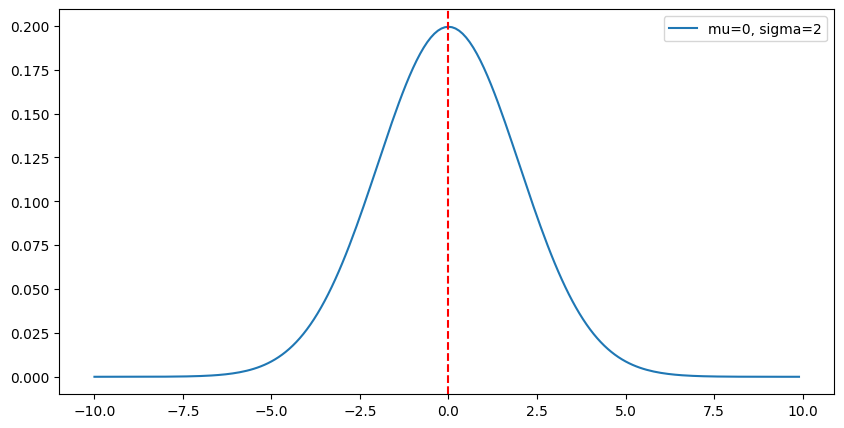

In [31]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
x = np.arange(-10, 10, 0.1)

y1 = norm.pdf(x, 0, 2)
plt.figure(figsize=(10,5))
plt.plot(x, y1, label="mu=0, sigma=2" )
plt.axvline(x=0, color='red', linestyle='--')
plt.legend()
plt.show()

In [32]:
norm.cdf(1, 0, 2)

0.6914624612740131

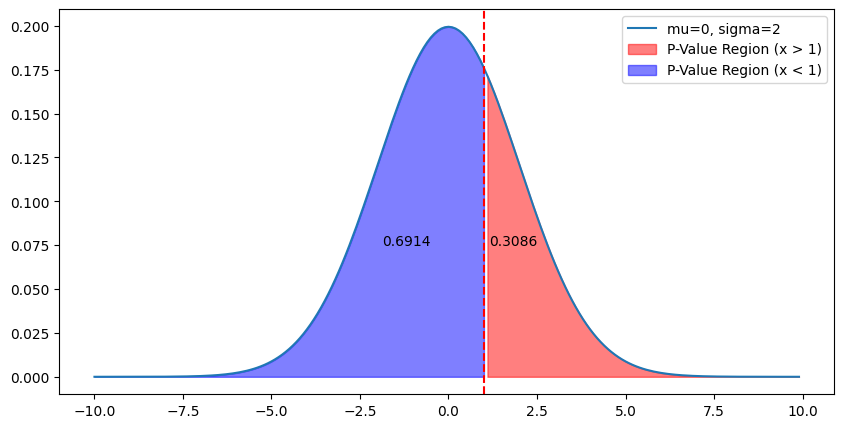

In [85]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
x = np.arange(-10, 10, 0.1)

y1 = norm.pdf(x, 0, 2)
plt.figure(figsize=(10,5))
plt.plot(x, y1, label="mu=0, sigma=2" )
plt.axvline(x=1, color='red', linestyle='--')
plt.fill_between(x, y1, where=(x >= 1), color='red', alpha=0.5, label=f'P-Value Region (x > {1})')
plt.fill_between(x, y1, where=(x < 1), color='blue', alpha=0.5, label=f'P-Value Region (x < {1})')
plt.text(-0.5, 0.075, 0.6914, horizontalalignment='right')
plt.text(2.5, 0.075, 1-0.6914, horizontalalignment='right')
plt.legend()
plt.show()

In [34]:
1-norm.cdf(1, 0, 2)

0.3085375387259869

In [35]:
norm.cdf(1, 0, 2)-norm.cdf(-1, 0, 2)

0.38292492254802624

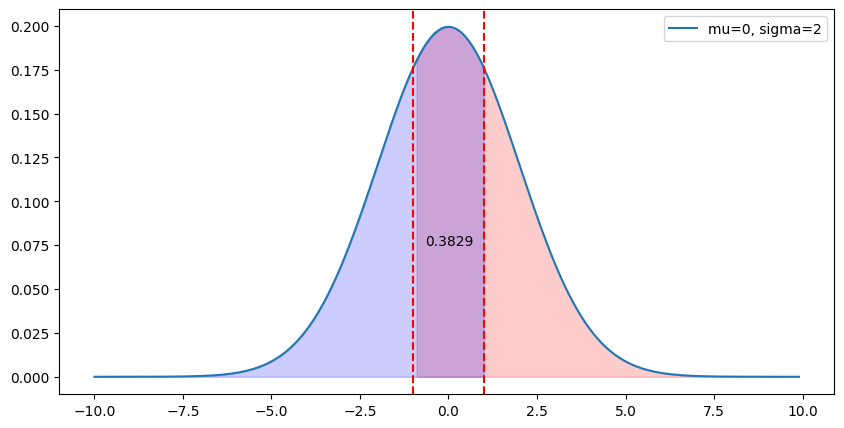

In [100]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
x = np.arange(-10, 10, 0.1)

y1 = norm.pdf(x, 0, 2)
plt.figure(figsize=(10,5))
plt.plot(x, y1, label="mu=0, sigma=2" )
plt.axvline(x=1, color='red', linestyle='--')
plt.axvline(x=-1, color='red', linestyle='--')
plt.text(0.7, 0.075, 0.3829, horizontalalignment='right')
plt.fill_between(x, y1, where=(x>-1), color='red', alpha=0.2)
plt.fill_between(x, y1, where=(x<1), color='blue', alpha=0.2)
plt.legend()
plt.show()

### Percentiles para la distribución normal

In [37]:
norm.ppf(0.95,0,2)

3.2897072539029444

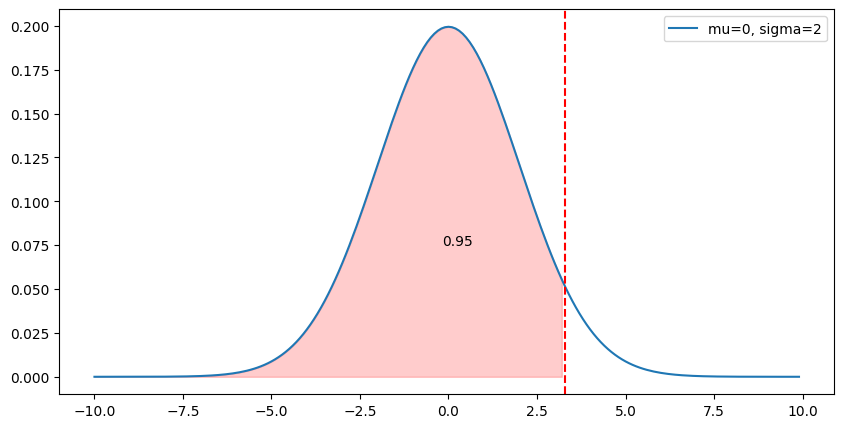

In [101]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
x = np.arange(-10, 10, 0.1)

y1 = norm.pdf(x, 0, 2)
plt.figure(figsize=(10,5))
plt.plot(x, y1, label="mu=0, sigma=2" )
plt.axvline(x=3.28, color='red', linestyle='--')
plt.text(0.7, 0.075, 0.95, horizontalalignment='right')
plt.fill_between(x, y1, where=(x<3.28), color='red', alpha=0.2)
plt.legend()
plt.show()

In [39]:
norm.cdf(3.2897, 0, 2)

0.9499996259309215

In [40]:
norm.ppf(0.2,0,2)

-1.6832424671458284

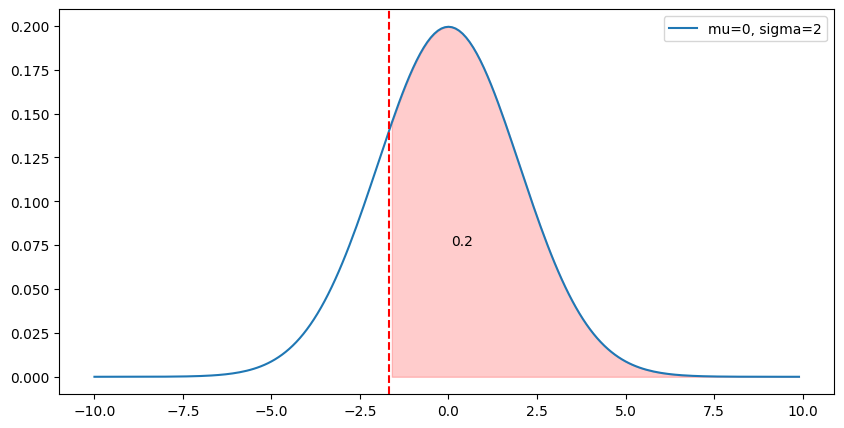

In [102]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
x = np.arange(-10, 10, 0.1)

y1 = norm.pdf(x, 0, 2)
plt.figure(figsize=(10,5))
plt.plot(x, y1, label="mu=0, sigma=2" )
plt.axvline(x=-1.68, color='red', linestyle='--')
plt.text(0.7, 0.075, 0.20, horizontalalignment='right')
plt.fill_between(x, y1, where=(x>-1.68), color='red', alpha=0.2)
plt.legend()
plt.show()

In [42]:
norm.cdf(-1.6832424671458284, 0, 2)

0.19999999999999996

# La distribución normal estandarizada

La distribución normal estándar es una distribución normal especial con una media $\mu=0$ y una desviación estándar $σ=1$. Cualquier distribución normal $N(\mu, \sigma^2)$ puede ser transformada a una distribución normal estándar $Z$ mediante la fórmula de estandarización:

$$z = \cfrac{x-\mu}{\sigma}$$


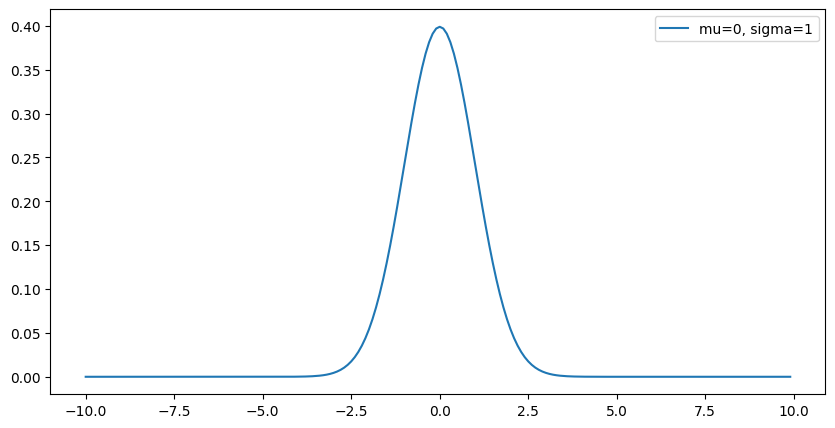

In [43]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
x = np.arange(-10, 10, 0.1)

y1 = norm.pdf(x, 0, 1)
plt.figure(figsize=(10,5))
plt.plot(x, y1, label="mu=0, sigma=1" )
plt.legend()
plt.show()

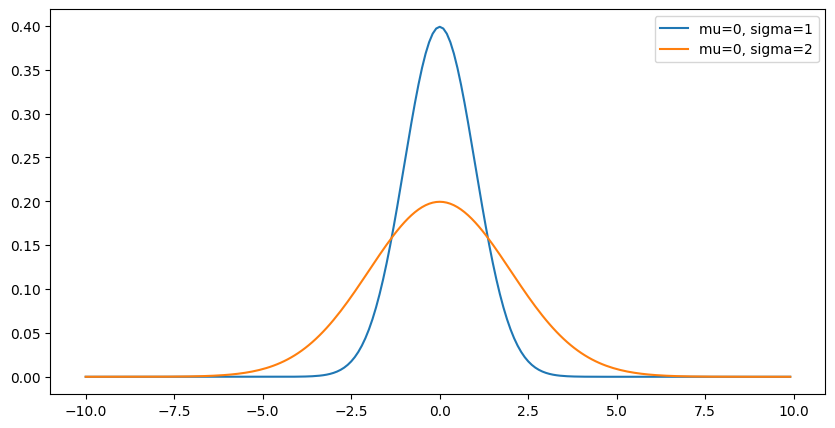

In [44]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
x = np.arange(-10, 10, 0.1)

y1 = norm.pdf(x, 0, 1)
y2 = norm.pdf(x, 0, 2)
plt.figure(figsize=(10,5))
plt.plot(x, y1, label="mu=0, sigma=1" )
plt.plot(x, y2, label="mu=0, sigma=2" )
plt.legend()
plt.show()

In [45]:
norm.cdf(1, 0, 2)

0.6914624612740131

In [46]:
(1-0)/2

0.5

In [47]:
norm.cdf(0.5, 0, 1)

0.6914624612740131

In [48]:
norm.cdf(1, 0, 1)-norm.cdf(-1, 0, 1)

0.6826894921370859

In [49]:
norm.cdf(2, 0, 1)-norm.cdf(-2, 0, 1)

0.9544997361036416

In [50]:
norm.cdf(3, 0, 1)-norm.cdf(-3, 0, 1)

0.9973002039367398

### Ejemplo

Suponga que el contenido de aceite en una botella de un litro sigue una distribución normal con media 1000 ml y desviación estandar 3 ml (Varianza $(3ml)^2=9 ml^2$.

Calcular
¿Cuál es la probabilidad de comprar una botella y que tenga menos de 998 ml?

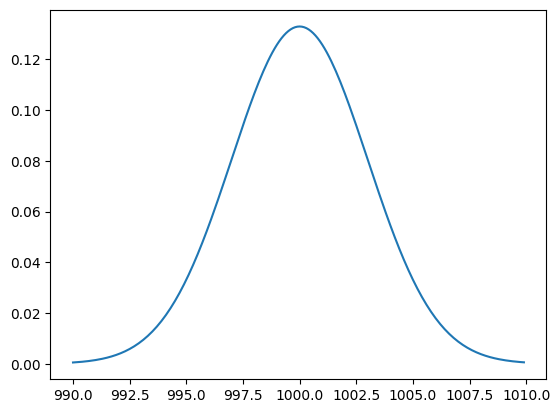

In [51]:
from scipy.stats import norm
x = np.arange(990, 1010, 0.1)

y1 = norm.pdf(x, 1000, 3)
plt.plot(x, y1, label="mu=1000, sigma=3" )

In [52]:
## ¿Cuál es la probabilidad de comprar una botella y que tenga menos de 998 ml?
norm.cdf(998, 1000, 3)

0.2524925375469229

In [53]:
## Cual es la probabilidad que una botella tenga más de 1010 ml
norm.cdf(1010, 1000, 3)

0.9995709396668032

In [54]:
1-norm.cdf(1010, 1000, 3)

0.0004290603331967846

In [55]:
norm.sf(1010, 1000, 3)

0.0004290603331968372

### Ejemplo

Asumamos que el tiempo de vida de una persona en años sigue una distribucion normal con media 70 años y desviación 20 años.

(NO SE DEBE USAR LA NORMAL PARA TIEMPOS DE VIDA)

In [56]:
# De un grupo de 1000 personas, cuantas se espera que sobrevivan a los 90 años.

## Probabilidad de que muera antes de los 90 años
norm.cdf(90, 70, 20)

0.8413447460685429

In [57]:
## Probabilidad de que muera despues de los 90 años
1-norm.cdf(90, 70, 20)

0.15865525393145707

In [58]:
## Probabilidad de que sobreviva a los 90 años
norm.sf(90, 70,20)

0.15865525393145707

$$P(\text{Morir despues de los 90 años})= 0.16 = \frac{16}{100}$$

In [59]:
## Cuantas espero que van a vivir más allá de los 90 años.
norm.sf(90, 70,20)*1000

158.65525393145708

In [60]:
### Probabilidad de morir entre 65 y 85
norm.cdf(85, 70, 20) - norm.cdf(65, 70, 20)
## Los que mueren antes de los 85 menos los que mueren antes de los 65

0.37207897330605544

In [61]:
### Probabilidad de morir entre 65 y 85
### los que sobreviven a los 65 menos los que sobreviven a los 85
norm.sf(65, 70, 20) - norm.sf(85, 70, 20)

0.3720789733060555

In [62]:
## A que edad muere el 90% de la población que muere más joven
## P(Edad de muerte sea menor que x) = 0.9
norm.ppf(0.9, 70, 20)

95.63103131089201

Ahora, si se estandariza la variable

$$Z=\cfrac{x-70}{20}$$

¿Probabilidad de que muera antes de los 90 años?
$x=90$

$z=1$

In [63]:
norm.cdf(90, 70, 20)

0.8413447460685429

In [64]:
## Probabilidad de que muera antes de los 90 años
norm.cdf(1, 0, 1)

0.8413447460685429

In [65]:
## Probabilidad de que sobreviva a los 90 años
norm.sf(90, 70,20)

0.15865525393145707

In [66]:
norm.sf(1, 0,1)

0.15865525393145707

In [67]:
### Probabilidad de morir entre 65 y 85
norm.cdf(85, 70, 20) - norm.cdf(65, 70, 20)
## Los que mueren antes de los 85 menos los que mueren antes de los 65

0.37207897330605544

In [68]:
a=(65-70)/20
a

-0.25

In [69]:
b=(85-70)/20
b

0.75

In [70]:
norm.cdf(b, 0, 1)-norm.cdf(a, 0, 1)

0.37207897330605544

### Ejercicios

1. El peso máximo que un ascensor puede elevar es de 250 kg. Si conocemos que el peso humano se distribuye según una normal de media 70 y desviación 20 . Calcular la probabilidad de que el ascensor no aguante si suben en él tres personas. Las tres personas pesaran en promedio 210 kg, y la varianza de ese peso sería $3*(20kg)^2$, la desviación estandar sería $\sqrt{3*20^2}=34.64 kg$

2. El coeficiente intelectual de los humanos se distribuye normalmente con media 100 y desviación típica 15 .En Colombia con 50 millones de habitantes
* ¿Cuántos normales habrá, si se denomina normal a la persona con coeficiente entre 95 y 105 ?
* ¿Cuántas personas habrá de inteligencia superior si ésta es aquella cuyo coeficiente es superior a 130?

3. 	Se ha comprobado que el peso de un paquete sigue una distribución normal . Los controles de calidad revelaron que un tienen una media de 850 y una desviación de 50 g .
* La probabilidad de que si elegimos un paquete al azar éste pese más de 850 g.
* Si en una semana salen al mercado 40000 paquetes ¿Cuántos cabe esperar que pesen mas de 900 g?

# Otras distribuciones de probabilidad continua

## Distribución Exponencial

Es la distribución continua de la **cantidad de tiempo hasta que ocurre un próximo evento en un proceso de Poisson**. Se usa para modelar tiempos de espera entre eventos en procesos que ocurren de manera continua e independiente a una tasa constante.

Es una herramienta esencial en áreas tales como estudios de confiabilidad y teoría de colas.

### Características Principales

* **Memoria Sin Memoria**: Una propiedad clave de la distribución exponencial es que es "sin memoria", lo que significa que la probabilidad de que ocurra un evento en un intervalo de tiempo futuro es independiente de cualquier historia pasada.

* **Eventos Raros**: La distribución exponencial es adecuada para modelar el tiempo de espera para eventos que ocurren raramente pero de manera constante a lo largo del tiempo.

### Parámetros
La distribución exponencial se caracteriza por un único parámetro, $λ$ (la tasa), que es el número promedio de eventos por unidad de tiempo. El parámetro $λ$ es también el inverso de la media ($μ$) de la distribución, es decir,

$$ λ = \cfrac{1}{μ}$$

### Función de Densidad de Probabilidad (FDP)

La función de densidad de probabilidad de una variable aleatoria exponencial
$X$ se define como:

$$
f(x; \lambda) =
\begin{cases}
\lambda e^{-\lambda x} & \text{si } x \geq 0, \\
0 & \text{si } x < 0.
\end{cases}
$$
Función de Distribución Acumulativa (CDF)

$$
F(x; \lambda) =
\begin{cases}
1 - e^{-\lambda x} & \text{si } x \geq 0, \\
0 & \text{si } x < 0.
\end{cases}
$$
La función de distribución acumulativa, que mide la probabilidad de que $X$ sea menor o igual que un valor particular $x$, se da por:

### Media

$$
\text{E}[X]= \mu =\frac{1}{\lambda}
$$
### Varianza

$$
\text{Var}(X) = σ^2 =\frac{1}{\lambda^2}
$$

### Exponencial con Python

Necesitamos dos parámetros:

1. El valor de $x =$ tiempo máximo que pasará para que un evento ocurra.

2. $scale = 1/lambda$

In [71]:
from scipy.stats import expon


Supongamos que quieres calcular la probabilidad de que el tiempo hasta la próxima llamada (en un centro de llamadas) sea de menos de 10 minutos, dado que la tasa de llamadas (λ) es de 3 llamadas por hora.

1. Convertir minutos a horas:

Dado que $λ=3$ llamadas por hora, el tiempo en horas para 10 minutos es

$$\frac{Horas}{minutos}=\frac{1}{60}=\ \frac{x}{10}$$

$$x\ =10\ast\frac{1}{60}= \frac{1}{6}$$

  horas te dará la probabilidad de que el tiempo hasta la próxima llamada sea menor que 10 minutos.

In [72]:
probabilidad = expon.cdf(1/6, scale=1/3)
print(f"Probabilidad de que la próxima llamada ocurra en menos de 10 minutos: {probabilidad:.4f}")


Probabilidad de que la próxima llamada ocurra en menos de 10 minutos: 0.3935


Así que hay aproximadamente un 39.3% de probabilidad de que la próxima llamada ocurra dentro de los próximos 10 minutos.

In [73]:
media = expon.mean(scale=1/3)
varianza = expon.var(scale=1/3)

print(f"Media del tiempo de espera: {media:.2f} horas")
print(f"Varianza del tiempo de espera: {varianza:.2f} horas^2")


Media del tiempo de espera: 0.33 horas
Varianza del tiempo de espera: 0.11 horas^2


In [74]:
import numpy as np
np.sqrt(varianza)

0.3333333333333333

### Implementación en Python para Simulación

Podemos usar Python para simular este escenario y realizar cálculos adicionales:

In [75]:
lambda_rate = 3  # llamadas por hora
scale = 1 / lambda_rate  # El inverso de la tasa es el parámetro de escala

# Generar 1000 muestras aleatorias de la distribución exponencial
muestras = expon.rvs(scale=scale, size=1000)



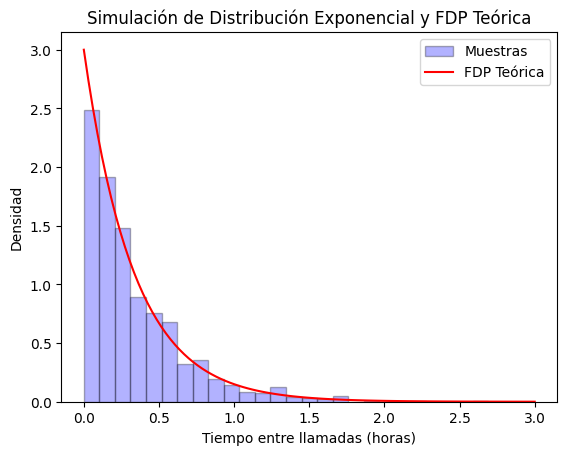

In [76]:
import matplotlib.pyplot as plt

# Configurar los bins del histograma
bins = np.linspace(0, 3, 30)

# Dibujar el histograma de las muestras
plt.hist(muestras, bins=bins, alpha=0.3, label='Muestras', density=True, color='blue',edgecolor='black')

# Generar valores x para la FDP
x = np.linspace(0, 3, 100)

# Calcular la FDP para estos valores x
fdp = expon.pdf(x, scale=scale)

# Dibujar la FDP
plt.plot(x, fdp, 'r-', label='FDP Teórica')

# Añadir títulos y etiquetas
plt.title('Simulación de Distribución Exponencial y FDP Teórica')
plt.xlabel('Tiempo entre llamadas (horas)')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()


## La distribución Gamma

La distribución gamma es una distribución de probabilidad continua que juega un papel crucial en diversas áreas como la estadística, la teoría de colas, la economía, la ingeniería y las ciencias ambientales. Es especialmente útil para **modelar el tiempo de espera hasta que ocurren múltiples eventos** en procesos que tienen tiempos entre eventos que siguen una distribución exponencial.

### Características Principales

* **Forma Flexible**: La distribución gamma es conocida por su flexibilidad en la forma de su curva de probabilidad, que varía según sus parámetros. Puede adoptar formas que van desde una curva exponencial hasta distribuciones que se asemejan a la normal.
* **Soporte Positivo**: Al igual que la distribución exponencial, la distribución gamma toma valores en el rango de 0 a ∞, lo que la hace adecuada para modelar tiempos de espera y longitudes de vida.

* **Relación con Otras Distribuciones**: Es una generalización de otras distribuciones; por ejemplo, cuando el parámetro de forma es igual a 1, la distribución gamma se reduce a una distribución exponencial. Además, la suma de varios valores de variables aleatorias exponencialmente distribuidas (con el mismo parámetro) sigue una distribución gamma.

### Parámetros
La distribución gamma está caracterizada por dos parámetros:

* **Forma** α: También conocido como el parámetro de forma, a veces denotado como $k$ en otras literaturas.
* **Escala** β: También conocido como el parámetro de escala, inverso de la tasa λ en algunas definiciones, donde β=1/λ.



### Función de Densidad de Probabilidad (FDP)

La función de densidad de probabilidad de una distribución gamma es definida por la siguiente fórmula:

$$
f(x; \alpha, \beta) = \frac{x^{\alpha-1} e^{-\frac{x}{\beta}}}{\beta^\alpha \Gamma(\alpha)} \quad \text{para } x > 0
$$
Donde
* $x$ es la variable aleatoria.
* $\alpha$ es el parámetro de forma.
* $\beta$ es el parámetro de escala.
* $\Gamma(\alpha)$ es la función gamma, definida como $$\Gamma(\alpha) = \int_0^\infty t^{\alpha-1} e^{-t} dt$$


### Ejemplo Práctico: Tiempos de Servicio en un Sistema de Colas

Supongamos que en un centro de servicio, el tiempo que un técnico tarda en atender a un cliente sigue una distribución gamma, con un parámetro de forma α=2 y un parámetro de escala β=3 horas. Podríamos estar interesados en calcular la probabilidad de que un servicio tome más de 5 horas.

In [77]:
from scipy.stats import gamma

# Parámetros
alpha = 2
beta = 3
# Calcular la probabilidad de que el tiempo de servicio sea menor que 5 horas
probm5 = gamma.cdf(5, a=alpha, scale=beta)
print(f"Probabilidad de que el tiempo de servicio sea > 5 horas: {probm5:.4f}")

# Calcular la probabilidad de que el tiempo de servicio sea mayor que 5 horas
probM5 = 1 - gamma.cdf(5, a=alpha, scale=beta)
print(f"Probabilidad de que el tiempo de servicio sea > 5 horas: {probM5:.4f}")



Probabilidad de que el tiempo de servicio sea > 5 horas: 0.4963
Probabilidad de que el tiempo de servicio sea > 5 horas: 0.5037


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

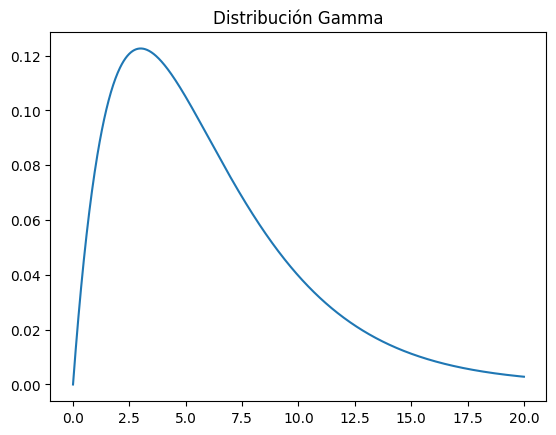

In [78]:
import numpy as np
import matplotlib.pyplot as plt
# Parámetros
alpha = 2
beta = 3
# Generar valores x para la FDP
x = np.linspace(0, 20, 1000)
fdp = gamma.pdf(x, a=alpha, scale=beta)

# Crear la gráfica de la FDP
plt.plot(x, fdp, label='FDP Gamma')
plt.title('Distribución Gamma')
plt


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

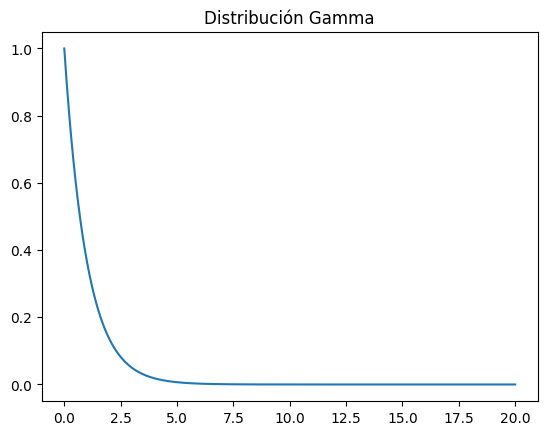

In [79]:
x = np.linspace(0, 20, 1000)
fdp = gamma.pdf(x, a=1, scale=1)

# Crear la gráfica de la FDP
plt.plot(x, fdp, label='FDP Gamma')
plt.title('Distribución Gamma')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

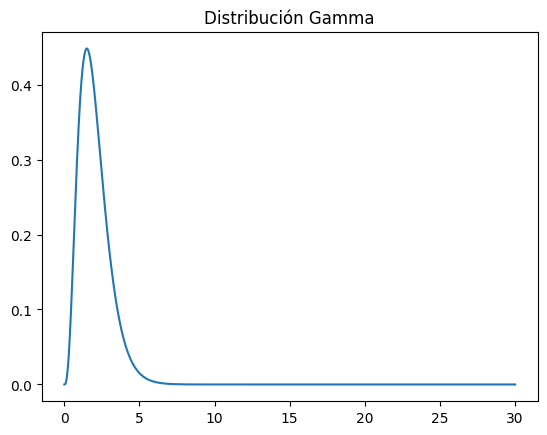

In [80]:
x = np.linspace(0, 30, 1000)
fdp = gamma.pdf(x, a=4, scale=0.5)

# Crear la gráfica de la FDP
plt.plot(x, fdp, label='FDP Gamma')
plt.title('Distribución Gamma')
plt

**OJO**


La distribución gamma no se convierte directamente en una distribución normal solo ajustando sus parámetros porque estas dos distribuciones son inherentemente diferentes en términos de sus características y aplicaciones fundamentales. La distribución gamma es siempre asimétrica, definida para valores positivos $x≥0$ y se utiliza principalmente para modelar tiempos de espera y otros procesos que no pueden producir valores negativos.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

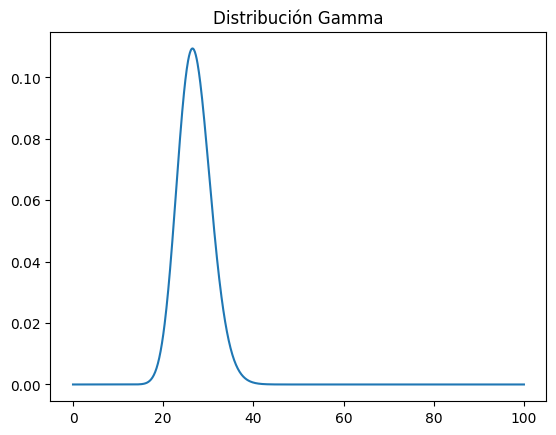

In [81]:
x = np.linspace(0, 100, 1000)
fdp = gamma.pdf(x, a=54, scale=0.5)

# Crear la gráfica de la FDP
plt.plot(x, fdp, label='FDP Gamma')
plt.title('Distribución Gamma')
plt

### Aproximación a la Distribución Normal

Cuando el parámetro de forma α es grande, se puede utilizar la siguiente aproximación para modelar la distribución gamma como una normal:

* Media μ de la distribución gamma: αβ
* Varianza $\sigma^2$ de la distribución gamma: $αβ^2$
* Desviación estándar $σ=\sqrt{α}\beta $

Entonces, la distribución gamma con parámetros α y β se puede aproximar por una distribución normal $N(αβ,\sqrt{α}\beta$ cuando α es suficientemente grande (una regla práctica podría ser $α≥30$.

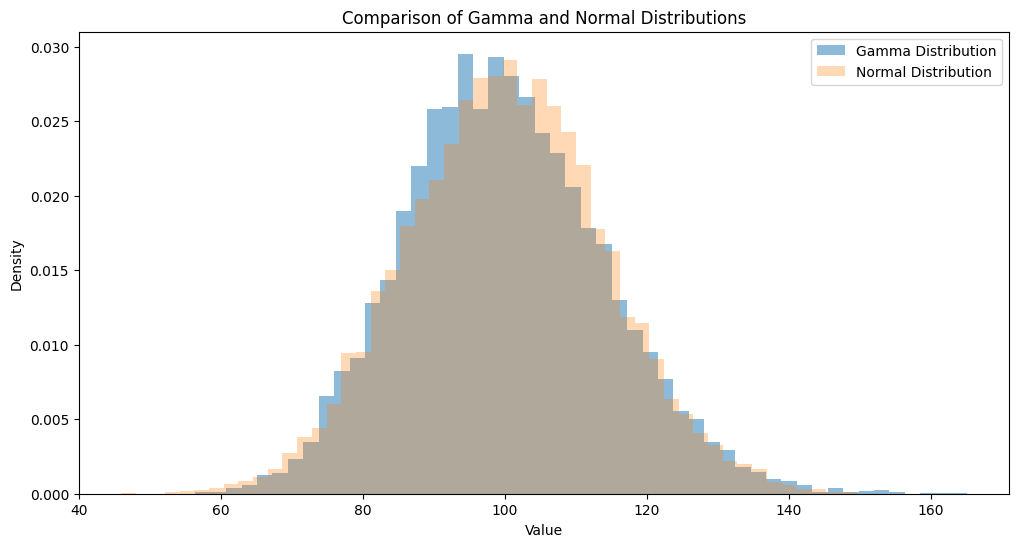

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

# Parámetros para la distribución gamma
alpha = 50  # Un valor grande para 'alpha'
beta = 2

# Parámetros derivados para la distribución normal aproximada
mu = alpha * beta
sigma = np.sqrt(alpha) * beta

# Generar datos para la gamma
gamma_data = gamma.rvs(a=alpha, scale=beta, size=10000)

# Generar datos para la normal
normal_data = norm.rvs(loc=mu, scale=sigma, size=10000)

# Crear gráficos
plt.figure(figsize=(12, 6))
plt.hist(gamma_data, bins=50, alpha=0.5, label='Gamma Distribution', density=True)
plt.hist(normal_data, bins=50, alpha=0.3, label='Normal Distribution', density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Comparison of Gamma and Normal Distributions')
plt.legend()
plt.show()


## Otras distribuciones y su manejo en Python

1. Acá están la mayoría de distribuciones, [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html)

